# 음성의 tempo와 rhythm을 관찰하는 프로그램
https://www.kaggle.com/code/enrcdamn/tempo-estimation-and-beat-tracking-pipeline#3.-Peak-Picking

In [28]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

In [29]:
sr = 32000

seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [30]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


Estimated tempo: [112.34714674] BPM


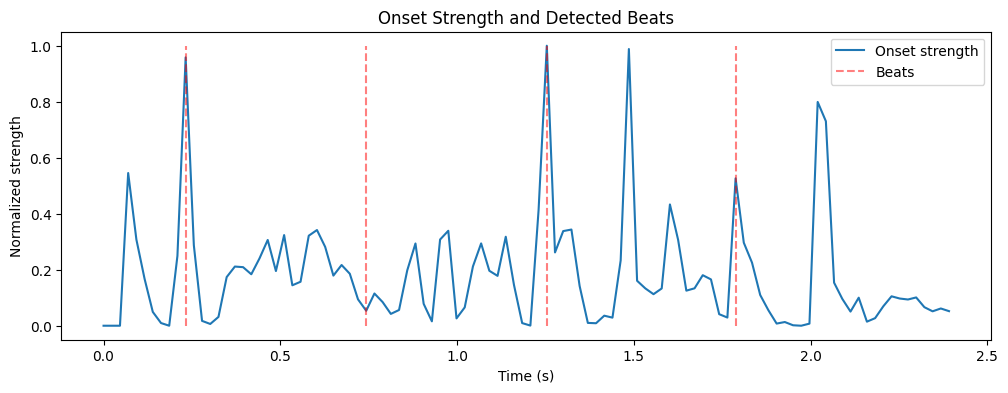

In [31]:
# 오디오 파일 로드
file_path = "./train/RUNQPNJF.ogg"  # 여기에 실제 파일 경로를 입력하세요
display(Audio(file_path))
y, sr = librosa.load(file_path)

# 템포 추정
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# 비트 위치 찾기
_, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# 리듬 특성 추출
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# 결과 출력
print(f"Estimated tempo: {tempo} BPM")

# 비트와 onset envelope 시각화
plt.figure(figsize=(12, 4))
times = librosa.times_like(onset_env, sr=sr)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beat_frames], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend()
plt.title('Onset Strength and Detected Beats')
plt.xlabel('Time (s)')
plt.ylabel('Normalized strength')
plt.show()

In [32]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

Estimated tempo: [161.49902344] BPM


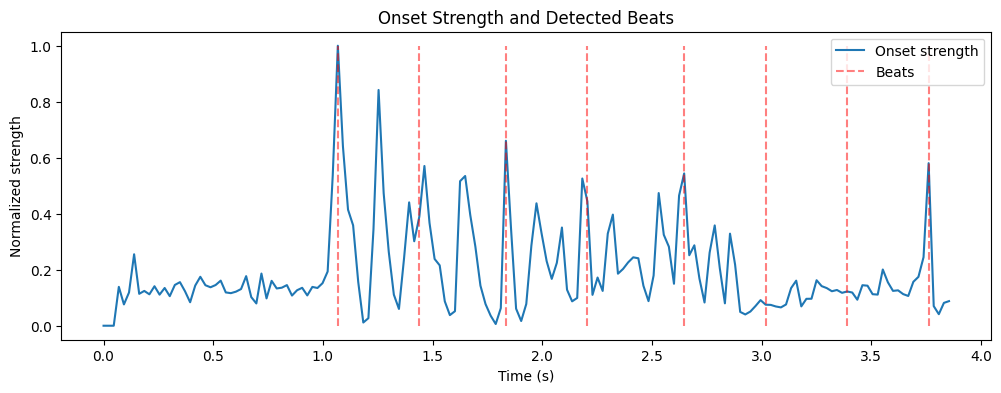

Estimated tempo: [143.5546875] BPM


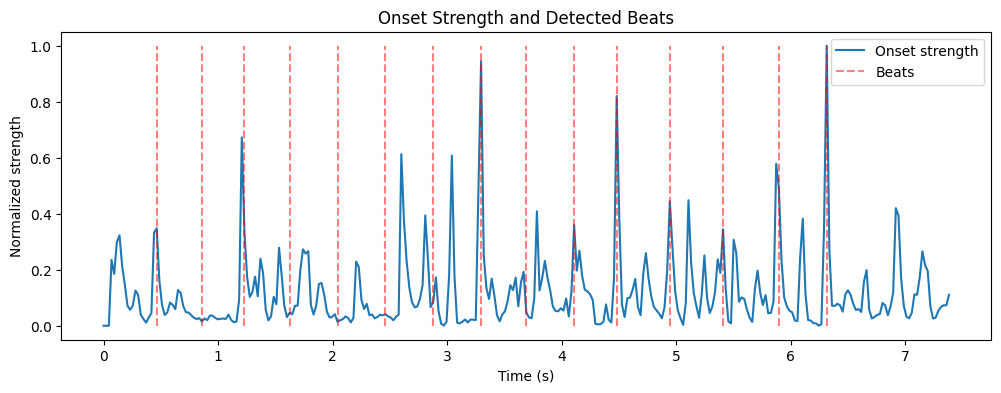

Estimated tempo: [80.74951172] BPM


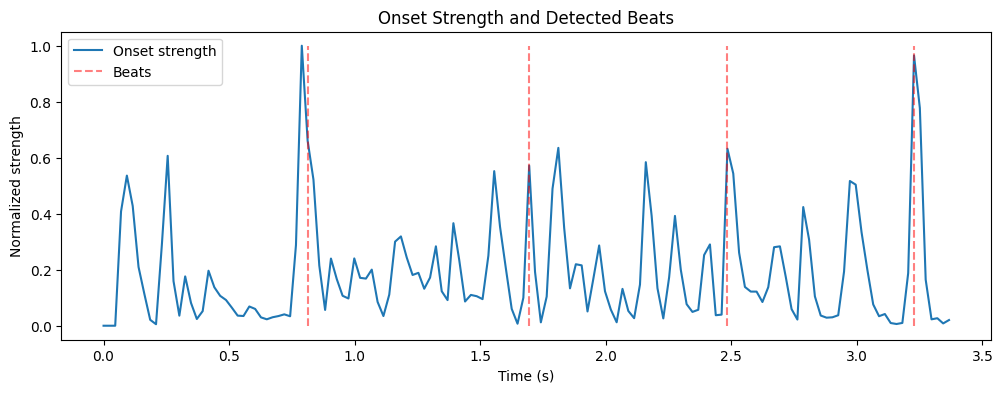

Estimated tempo: [92.28515625] BPM


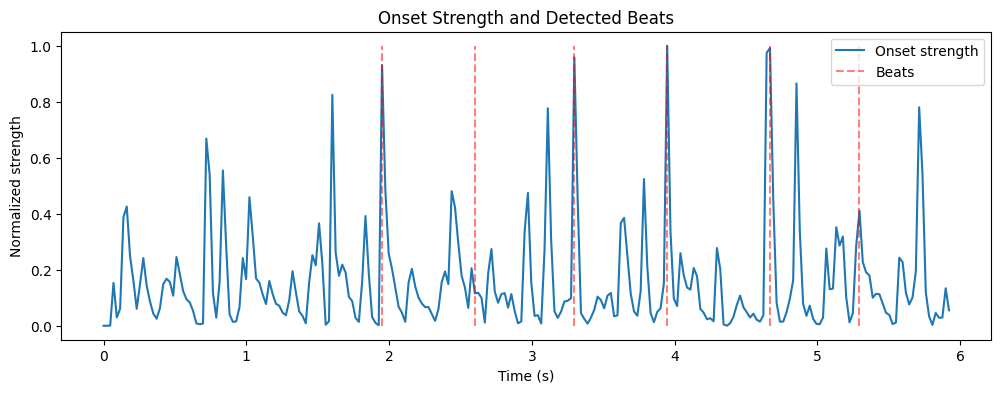

Estimated tempo: [92.28515625] BPM


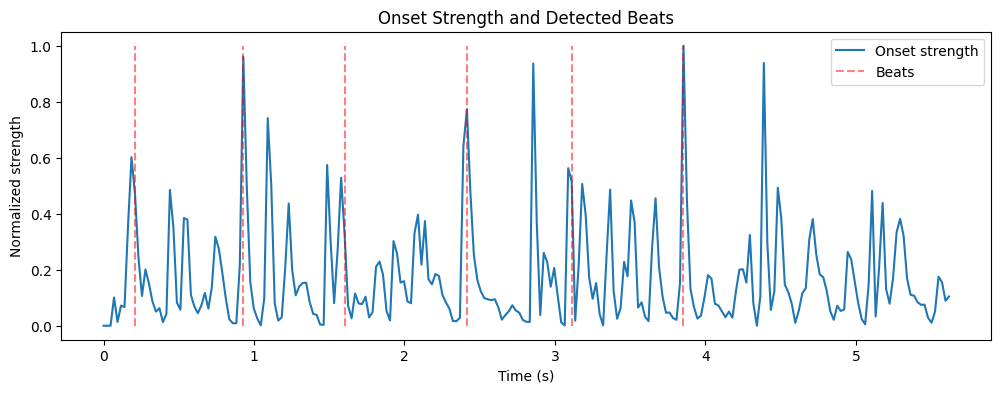

In [33]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    display(Audio(filename))
    y, sr = librosa.load(filename)

    # 템포 추정
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # 비트 위치 찾기
    _, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

    # 리듬 특성 추출
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)

    # 결과 출력
    print(f"Estimated tempo: {tempo} BPM")

    # 비트와 onset envelope 시각화
    plt.figure(figsize=(12, 4))
    times = librosa.times_like(onset_env, sr=sr)
    plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
    plt.vlines(times[beat_frames], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
    plt.legend()
    plt.title('Onset Strength and Detected Beats')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized strength')
    plt.show()

## train fake

Estimated tempo: [184.5703125] BPM


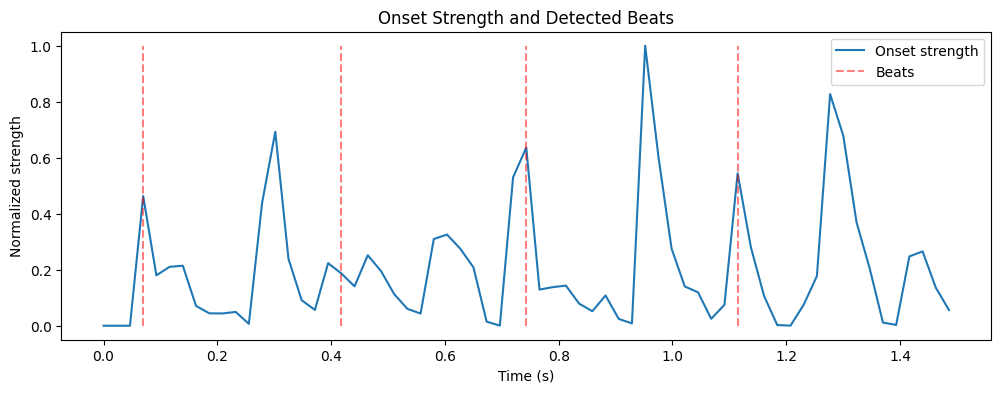

Estimated tempo: [161.49902344] BPM


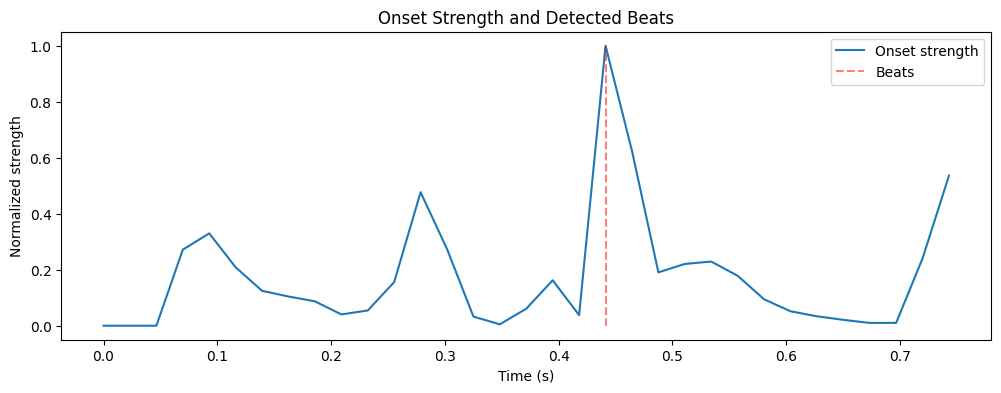

Estimated tempo: [143.5546875] BPM


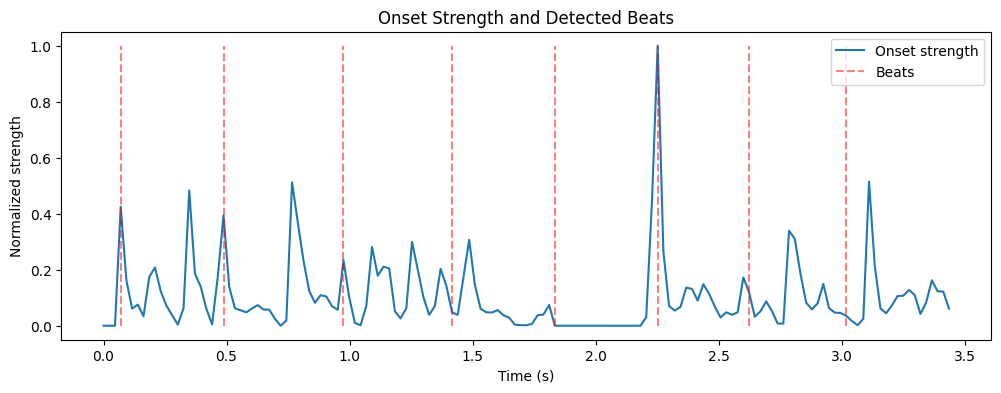

Estimated tempo: [143.5546875] BPM


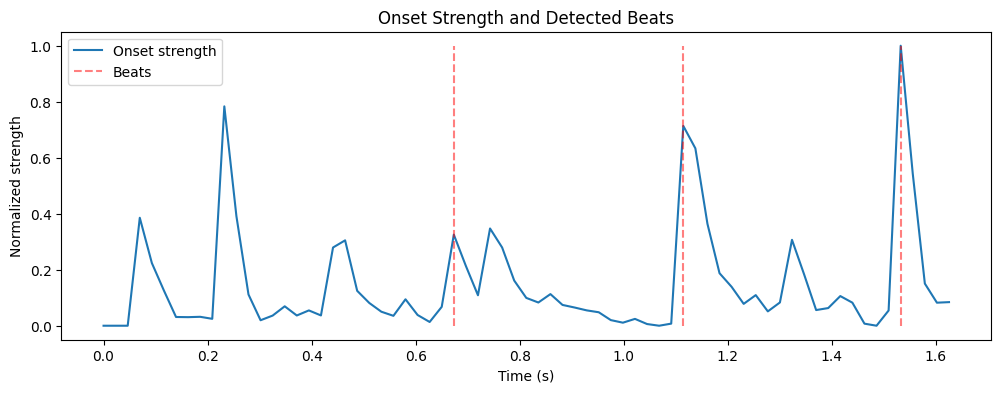

Estimated tempo: [161.49902344] BPM


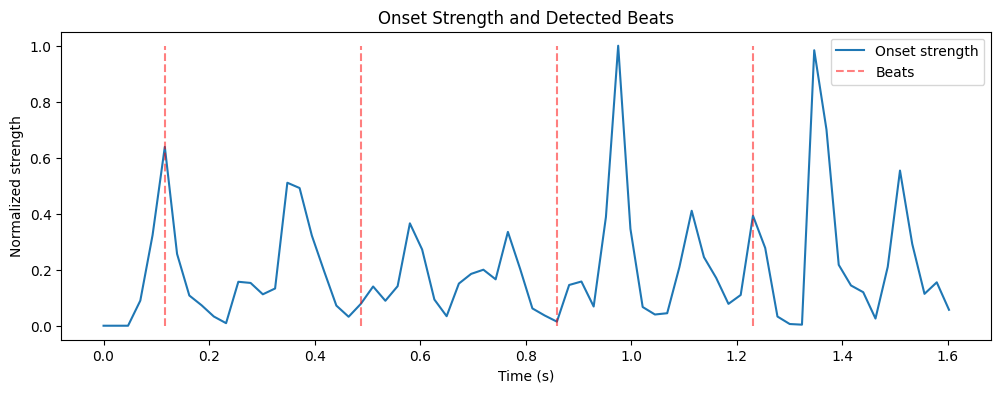

In [34]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    display(Audio(filename))
    y, sr = librosa.load(filename)
    
    # 템포 추정
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # 비트 위치 찾기
    _, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

    # 리듬 특성 추출
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)

    # 결과 출력
    print(f"Estimated tempo: {tempo} BPM")

    # 비트와 onset envelope 시각화
    plt.figure(figsize=(12, 4))
    times = librosa.times_like(onset_env, sr=sr)
    plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
    plt.vlines(times[beat_frames], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
    plt.legend()
    plt.title('Onset Strength and Detected Beats')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized strength')
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()